## 迭代

### 1. for 循环
*迭代（iteration）* 是一种重复执行某段代码的过程，直到满足某个条件为止。在 Python 中，我们可以使用 `for` 循环和 `while` 循环来实现迭代。

>需要注意的是，Python 中 range(a, b) 对应的区间是“左闭右开”的

In [ ]:
def for_loop(n: int) -> int:
    """for 循环"""
    res = 0
    # 循环求和 1,2,3,...,n
    for i in range(1, n + 1):
        res += i
    return res


if __name__ == "__main__":
    n = 5
    res = for_loop(n)
    print(f"\nfor 循环求和结果 res = {res}")


for 循环求和结果 res = 15


### 2. while 循环
与 `for` 循环类似，`while` 循环也是一种实现迭代的方法。在 `while` 循环中，程序每轮都会先检查条件，如果条件为真，则继续执行，否则就结束循环。

In [ ]:
def while_loop(n: int) -> int:
    """while 循环"""
    res = 0
    i = 1
    # 循环求和 1,2,3,...,n
    while i <= n:
        res += i
        i += 1
    return res


if __name__ == "__main__":
    n = 5
    res = while_loop(n)
    print(f"\nwhile 循环求和结果 res = {res}")


while 循环求和结果 res = 15


**`while` 循环比 `for` 循环的自由度更高**。在 `while` 循环中，我们可以自由地设计条件变量的初始化和更新步骤。

例如在以下代码中，条件变量 `i` 每轮进行两次更新，这种情况就不太方便用 `for` 循环实现：

In [ ]:
def while_loop_update(n: int) -> int:
    """while 循环（两次更新）"""
    res = 0
    i = 1  # 初始化条件变量 i
    # 循环求和 1,4,10,...
    while i <= n:
        res += i
        # 条件变量 i 每轮进行两次更新
        i += 1
        i *= 2
    return res


if __name__ == "__main__":
    n = 5
    res = while_loop_update(n)
    print(f"while 循环（两次更新）求和结果为 {res}")

while 循环（两次更新）求和结果为 5


总的来说，** `for` 循环的代码更加紧凑，`while` 循环更加灵活**，两者都可以实现迭代结构。选择使用哪一个应该根据特定问题的需求来决定。

### 3. 嵌套循环
我们可以在一个循环结构内嵌套另一个循环结构，下面以 `for` 循环为例：

In [ ]:
def nested_for_loop(n: int) -> str:
    """双层 for 循环"""
    res = ""
    # * 循环 i = 1, 2, ..., n-1, n
    for i in range(1, n + 1):
        # * 循环 j = 1, 2, ..., n-1, n
        for j in range(1, n + 1):
            res += f"({i},{j}),"
    return res


if __name__ == "__main__":
    n = 5
    res = nested_for_loop(n)
    print(f"\n双层 for 循环的遍历结果 {res}")


双层 for 循环的遍历结果 (1,1),(1,2),(1,3),(1,4),(1,5),(2,1),(2,2),(2,3),(2,4),(2,5),(3,1),(3,2),(3,3),(3,4),(3,5),(4,1),(4,2),(4,3),(4,4),(4,5),(5,1),(5,2),(5,3),(5,4),(5,5),


在这种情况下，函数的操作数量与 n<sup>2</sup>成正比，或者说算法运行时间和输入数据大小 n 成“平方关系”。

我们可以继续添加嵌套循环，每一次嵌套都是一次“升维”，将会使时间复杂度提高至“立方关系”“四次方关系”，以此类推。

### 递归
<ins>递归（recursion）</ins>是一种算法策略，通过函数调用自身来解决问题。它主要包含两个阶段。

1. **递**：程序不断深入地调用自身，通常传入更小或更简化的参数，直到达到“终止条件”。
2. **归**：触发“终止条件”后，程序从最深层的递归函数开始逐层返回，汇聚每一层的结果。
而从实现的角度看，递归代码主要包含三个要素。

1. **终止条件**：用于决定什么时候由“递”转“归”。
2. **递归调用**：对应“递”，函数调用自身，通常输入更小或更简化的参数。
3. **返回结果**：对应“归”，将当前递归层级的结果返回至上一层。

观察以下代码，我们只需调用函数 recur(n) ，就可以完成 1+2+3+...+n  的计算：

In [2]:
def recur(n: int) -> int:
    """递归"""
    # * 终止条件
    if n == 1:
        return 1
    # * 递：递归调用
    res = recur(n - 1)
    # * 归：返回结果
    return n + res


if __name__ == "__main__":
    n = 5
    res = recur(n)
    print(f"\n递归函数的求和结果 res = {res}")


递归函数的求和结果 res = 15


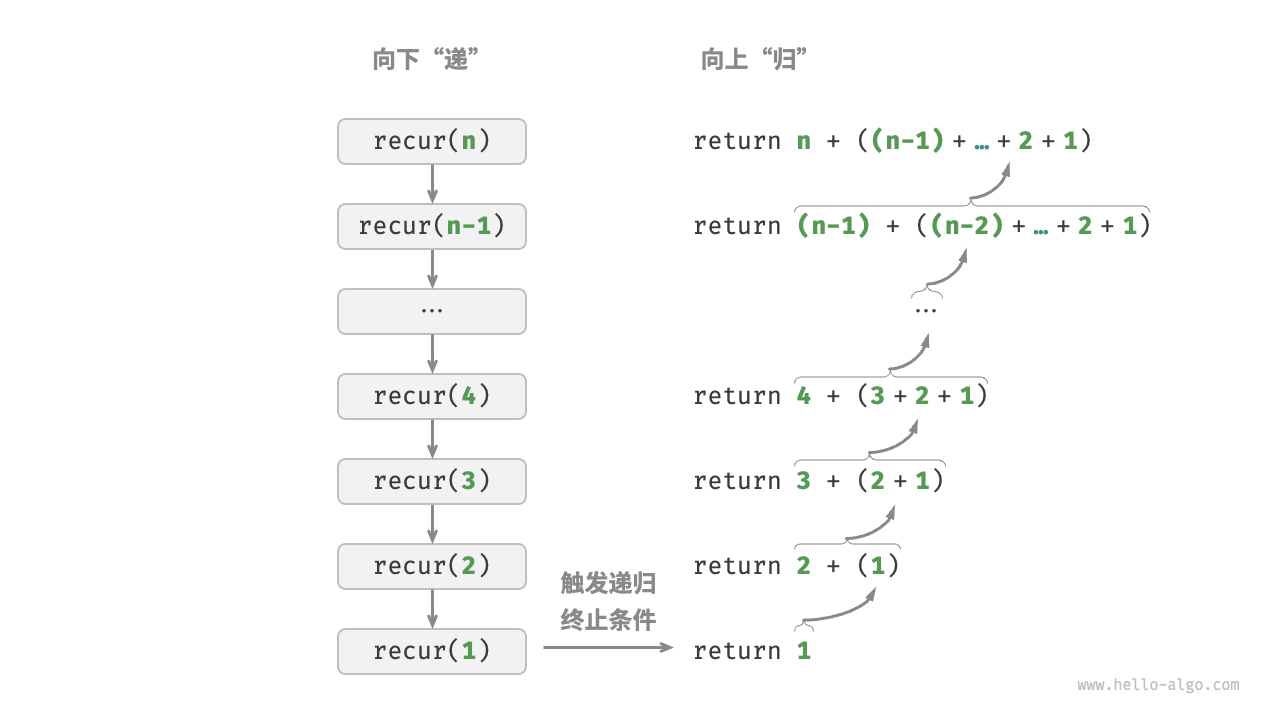


#### 1. 调用栈
递归函数每次调用自身时，系统都会为新开启的函数分配内存，以存储局部变量、调用地址和其他信息等。这将导致两方面的结果。
- 函数的上下文数据都存储在称为“栈帧空间”的内存区域中，直至函数返回后才会被释放。因此，**递归通常比迭代更加耗费内存空间**。
- 递归调用函数会产生额外的开销。**因此递归通常比循环的时间效率更低**。

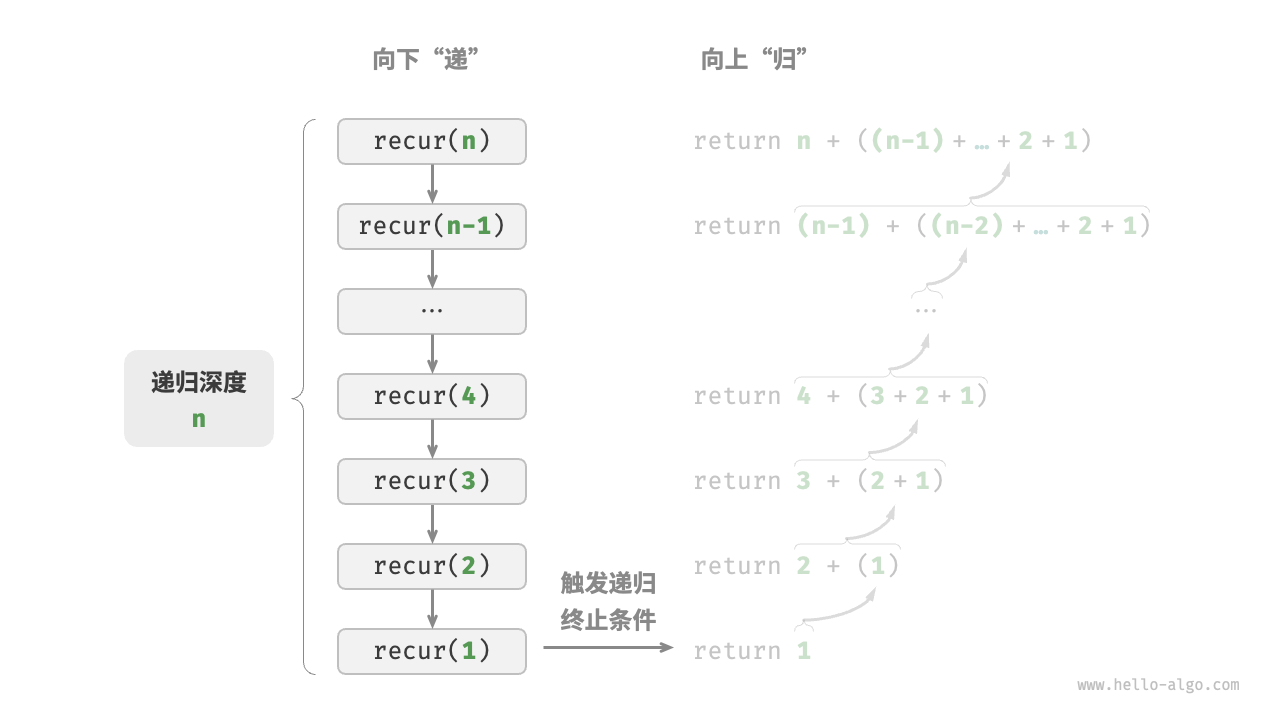

在实际中，编程语言允许的递归深度通常是有限的，过深的递归可能导致栈溢出错误。


#### 2. 尾递归
有趣的是，**如果函数在返回前的最后一步才进行递归调用**，则该函数可以被编译器或解释器优化，使其在空间效率上与迭代相当。这种情况被称为<ins>尾递归（tail recursion）</ins>。
- **普通递归**：当函数返回到上一层级的函数后，需要继续执行代码，因此系统需要保存上一层调用的上下文。
- **尾递归**：递归调用是函数返回前的最后一个操作，这意味着函数返回到上一层级后，无须继续执行其他操作，因此系统无须保存上一层函数的上下文。

以计算 1 + 2 + 3 + ... + n 为例，我们可以将结果变量 res 设为函数参数，从而实现尾递归：

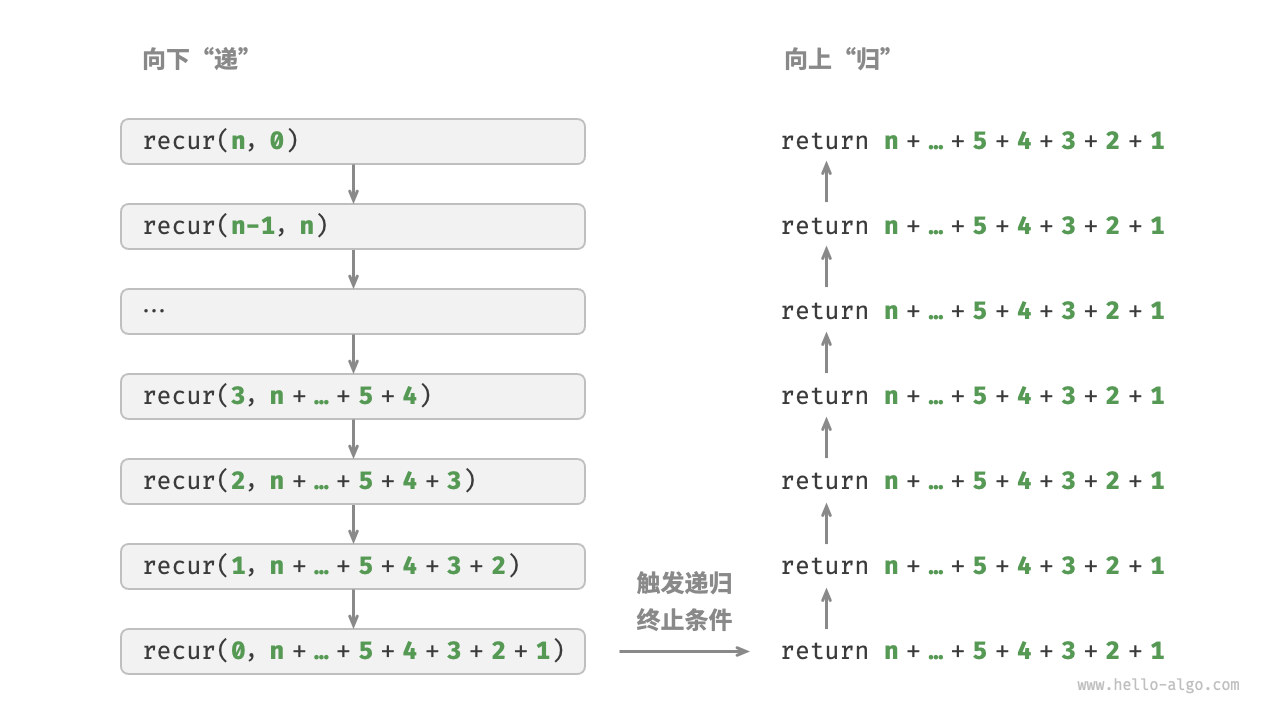

>请注意，许多编译器或解释器并不支持尾递归优化。例如，Python 默认不支持尾递归优化，因此即使函数是尾递归形式，仍然可能会遇到栈溢出问题。

In [6]:
def tail_recur(n, res):
    """尾递归"""
    # * 终止条件
    if n == 0:
        return res
    # * 尾递归调用
    return tail_recur(n - 1, res + n)


if __name__ == "__main__":
    n = 5
    res = tail_recur(n, 0)
    print(f"\n尾递归函数的求和结果 res = {res}")


尾递归函数的求和结果 res = 15


#### 3. 递归树
当处理与“分治”相关的算法问题时，递归往往比迭代的思路更加直观、代码更加易读。以“斐波那契数列”为例。


>给定一个斐波那契数列 0,1,1,2,3,5,8,13,21 ，求该数列的第 n 个数字。

In [9]:
def fib(n: int) -> int:
    """斐波那契数列: 递归"""
    # * 终止条件 f(1) = 0, f(2) = 1
    if n == 1 or n == 2:
        return n - 1
    # * 递归调用 f(n) = f(n-1) + f(n-2)
    res = fib(n - 1) + fib(n - 2)
    # * 返回结果
    return res


if __name__ == "__main__":
    n = 2
    res = fib(n)
    print(f"\n斐波那契数列的第 {n} 项为: {res}")


斐波那契数列的第 2 项为: 1


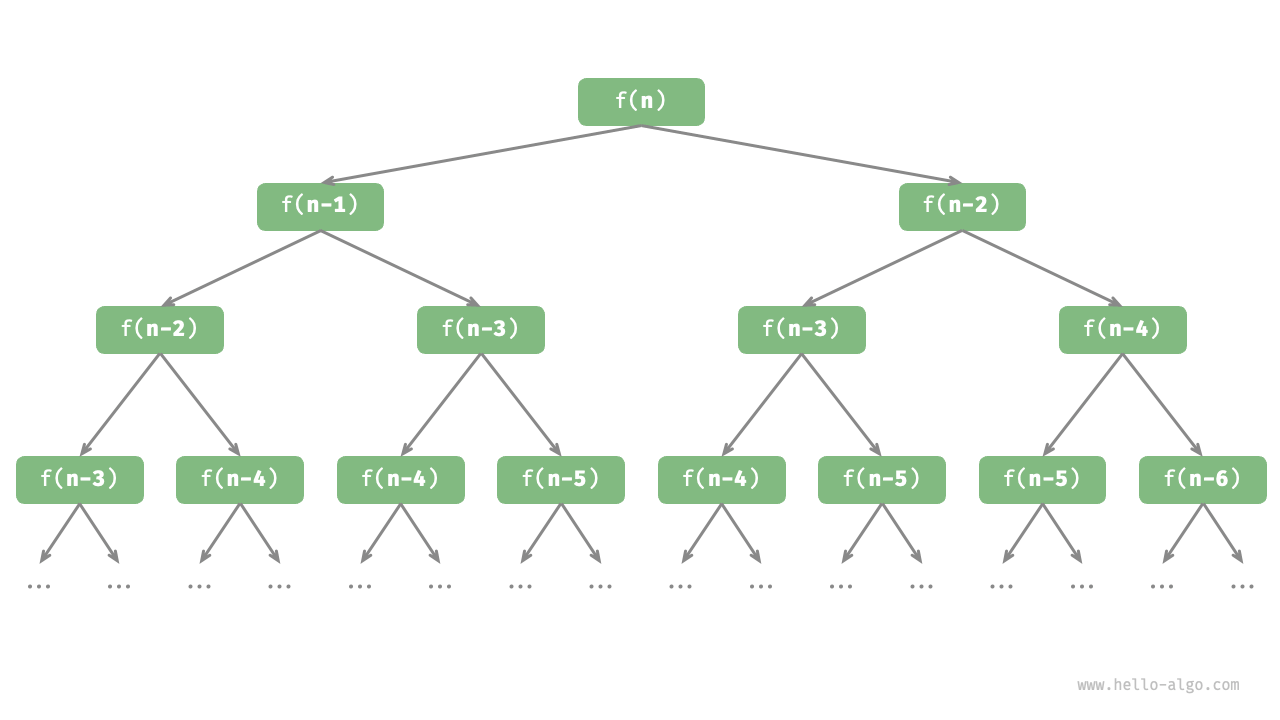

In [ ]:
def for_loop_recur(n: int) -> int:
    """使用迭代模拟递归"""
    # *使用一个显式的栈来模拟系统调用栈
    stack = []
    res = 0
    # *递：递归调用
    for i in range(n, 0, -1):
        # *通过“入栈操作”模拟“递”
        stack.append(i)
    # *归：返回结果
    while stack:
        # *通过“出栈操作”模拟“归”
        res += stack.pop()
    # *res = 1+2+3+...+n
    return res